## Unscented Kalman Filter ##

This notebook covers the required analysis for the Unscented Kalman Filter project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### NIS Testing ###

In [2]:
def readNIS(sensor, dof):
    dof95 = {1: 3.841, 2: 5.991, 3: 7.815, 4: 9.488, 5: 11.070}
    pct95 = dof95[dof]

    with open('./NIS_' + sensor + '.txt') as f:
        NIS = pd.read_table(f, sep='\t', header=None, names=['NIS'], lineterminator='\n')

    NIS = np.asarray(NIS['NIS'])
    print("\nFor the '{}' sensor ({} dof):".format(sensor, dof))
    print("> records = {}.".format(len(NIS)))
    print("> expected 95th percentile = {}.".format(pct95))
    print("> calculated 95th percentile = {}.".format(np.percentile(NIS, 95)))

    return NIS, pct95

radarNIS, radar95  = readNIS('radar', 3)

lidarNIS, lidar95  = readNIS('lidar', 2)


For the 'radar' sensor (3 dof):
> records = 249.
> expected 95th percentile = 7.815.
> calculated 95th percentile = 7.277755999999998.

For the 'lidar' sensor (2 dof):
> records = 249.
> expected 95th percentile = 5.991.
> calculated 95th percentile = 4.843766.


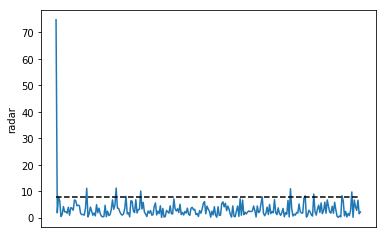

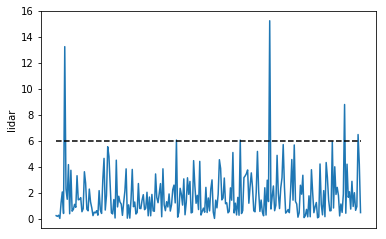

In [3]:
def plotNIS(sensor, y, pct95):
    x = np.arange(0, len(y));
    plt.plot(x, y)
    plt.plot([0, x[-1]], [pct95, pct95], color='black', linestyle="--")
    plt.ylabel(sensor)
    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    plt.show()

plotNIS('radar', radarNIS, radar95)

plotNIS('lidar', lidarNIS, lidar95)

### NIS Testing - Conclusion ###

The NIS testing results show that the data is reasonable compared to the expected 95th percentile for both the Radar and Lidar sensors.